# Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

`import sys` <br>
`sys.path.append('/*SOME_PATH*/my_code/my_utils')` <br>
`from utils.plot import plot_denisty` <br>

<br>    
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

В данной домашке вам предлагается реализовать две функции на датасете титаник, немного измененном следующим образом:

In [1]:
import pandas as pd

df = pd.read_csv('titanic/train.csv')
df.Embarked.replace('Q', '', inplace=True)
df.PassengerId = df.PassengerId.astype('string')

## tool: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

In [2]:
def get_df_info(df, thr = 0.5,  *args, **kwargs):
    '''
    Данная функция выводит информацию о столбцах входного датафрейма

    df: исходный датафрейм
    ...

    returns: pd.DataFrame с инфой

    '''
    # Получение имен колонок
    column_names = df.columns
    
    # Создание пустого датафрейма
    df_info = pd.DataFrame(index=column_names)
    
    # Создание колонки с типом данных в ней 
    df_info['dtype'] = [df[col].dtype.name for col in column_names]
    
    # Получение количества различных эл-тов в колонке
    df_info['nunique'] = df.nunique(dropna=False)
    
    # Получение доли нанов в каждой колонке
    df_info['nan_percent'] = (
        df.isna().sum() / df.shape[0]
        ).apply(lambda x : 'zero' if (x < 1e-9) else round(x, 3))
    
    # Получение доли нулей в каждой колонке
    df_info['zero_percent'] = (
        (df == 0).sum() / df.shape[0]
        ).apply(lambda x : 'zero' if (x < 1e-9) else round(x, 3))
    
    # Получение доли пустых строк в колонке
    df_info['empty_str_percent'] = (
        (df == '').sum() / df.shape[0]
        ).apply(lambda x : 'zero' if (x < 1e-9) else round(x, 3))
    
    # Получение самого встречающегося эл-та и его частоты
    vals = []
    freqs = []
    # Вводим спец переменную для след пункта задачи
    ex_of_data = []
    for col in column_names:
        val_counts = df[col].value_counts().reset_index()
        most_freq_val = val_counts.iloc[0].values[0]
        
        # Проверяем, что есть второй по частоте элемент
        if len(val_counts) > 1:
            second_val = val_counts.iloc[1].values[0]
        else:
            second_val = None  # Если нет второго элемента, задаем None
        ex_of_data.append((most_freq_val, second_val))
        
        freq = val_counts.iloc[0].values[1] / df[col].count()
        freq_rounded = 'zero' if (freq < 1e-9) else round(freq,3)
        vals.append(most_freq_val)
        freqs.append(freq_rounded)
    df_info['most_freq_val'] = vals
    df_info['most_freq_val_percent'] = freqs
    
    # Выводим в виде тапла пару двух самых частовстречающихся эл-та как пример 2 различных знач-й в колонке
    df_info['ex_of_data'] = ex_of_data
    
    # Подсчет trash_score
    tmp1 = df_info['nan_percent'].apply(lambda x : 0 if (x == 'zero') else x) + df_info['zero_percent'].apply(lambda x : 0 if (x == 'zero') else x) + df_info['empty_str_percent'].apply(lambda x : 0 if (x == 'zero') else x)
    tmp2 = df_info['most_freq_val_percent'].apply(lambda x : 0 if (x == 'zero') else x).where(
        df_info['most_freq_val_percent'].apply(lambda x : 0 if (x == 'zero') else x) > 0.5, 
        other = 0)
    trash_score = pd.DataFrame([tmp1, tmp2]).max()
    df_info['thrash_score'] = trash_score
    
    return df_info

In [3]:
# ваш пример
get_df_info(df)

,dtype,nunique,nan_percent,zero_percent,empty_str_percent,most_freq_val,most_freq_val_percent,ex_of_data,thrash_score
PassengerId,string,891,zero,zero,zero,1,0.001,"(1, 13)",0.000
Survived,int64,2,zero,0.616,zero,0,0.616,"(0, 1)",0.616
Pclass,int64,3,zero,zero,zero,3,0.551,"(3, 1)",0.551
Name,object,891,zero,zero,zero,"Braund, Mr. Owen Harris",0.001,"(Braund, Mr. Owen Harris, Boulos, Mr. Hanna)",0.000
Sex,object,2,zero,zero,zero,male,0.648,"(male, female)",0.648
Age,float64,89,0.199,zero,zero,24.0,0.042,"(24.0, 22.0)",0.199
SibSp,int64,7,zero,0.682,zero,0,0.682,"(0, 1)",0.682
Parch,int64,7,zero,0.761,zero,0,0.761,"(0, 1)",0.761
Ticket,object,681,zero,zero,zero,347082,0.008,"(347082, CA. 2343)",0.000
Fare,float64,248,zero,0.017,zero,8.05,0.048,"(8.05, 13.0)",0.017


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
,,,,,,,,,
Cabin,object,147,C148,B42,-1,n: 0.771,-1,"(0.02, G6)",0.771
Parch,int64,7,6,4,z: 0.761,-1,-1,"(0.761, 0)",0.761
SibSp,int64,7,8,5,z: 0.682,-1,-1,"(0.682, 0)",0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,"(0.616, 0)",0.616
Age,float64,88,74.0,34.5,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,3,'',C,-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,10.5167,9.8458,z: 0.017,-1,-1,"(0.048, 8.05)",0.017
Ticket,object,681,370376,111369,-1,-1,-1,"(0.008, 347082)",-1
Sex,object,2,female,male,-1,-1,-1,"(0.648, male)",-1


## tool: распределения признаков (6 баллов)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке и ответить на вопрос в конце

**!** Обновите matplotlib, seaborn до последней версии

In [1]:
# !pip install --upgrade matplotlib seaborn

Нужно реализовать рисовалку распределения колонок датафрейма через функцию или через класс, как вам удобней.
    Отрисовываемые колонки принимаются на вход. Далее вы для каждой такой колонки создаете `fig, ax` и отрисовываете туда то,
    что описано ниже в задании. Также, на вход принимается hue-колонка (см. семинар), по которой бьется раскраска.

- для числовых колонок
    - sns.histplot
        - предобработка данных: принимайте на вход флажок `drop_zero`. Если он True, выкиньте все нули прежде чем рисовать
        - количество бинов остается за вами
        - используйте аргументы `multiple='stack'`, `element='step'` (самый быстрый), `stat='count'`,
            `alpha=0.8` (чтобы подогнать цвет гистограммы под остальные цвета, без этого будет слишком яркий график)
        
    - sns.boxenplot + sns.stripplot
        - предобработка данных: если `drop_zero`, рисуем оба графика без нулей
        - в boxenplot используйте `showfliers=False`, выбросы будут подсвечиваться stripplot'ом
        - в stripplot не нужно рисовать все точки, нужно засэмплировать немного (напр. 200)
        
    - special (0, np.nan)
        - это будет sns.barplot, показывающий распределение по спец. значениям - нулям и нанам
        - предобработка данных: посчитайте для каждого значения колонки `hue` (см. groupby) долю нанов и нулей
            (независимо от `drop_zero`), оберните в датафрейм и отрисуйте с помощью sns.barplot
        - вместо чистого нуля используйте что-то отрицательное (напр. -0.1 * [значение самого высокого бина])
        - используйте у barplot аргумент `edgecolor='black'`
        - добавьте `ax.axhline(0, color='black', ls='--')` на этот же ax, чтобы четко выделить 0
        - добавьте горизонтальную решетку `ax.grid(True, axis='y')`
        
    
- для категориальных колонок
    - категориальными считаем все (числовые / нечисловые) колонки c количеством уникальных
        значений меньше `max_cat_thr`: принимаем на вход (напр. 20)
        
    - sns.countplot + обработка пустых строк, нанов
        - предобработка данных: замените все наны и пустые строки на понятные вам спецстроки для наглядности (см. пример)
        - используйте `stat='count'`, `edgecolor='black'`
        - добавьте горизонтальную решетку
        - поверните выводимые значения на оси X на 90 градусов `ax.tick_params('x', rotation=90)`
        
        
- общее:
    - убедитесь, что не рисуете колонку, которую передаете в hue, а также колонки, которые не попали ни в числовые,
        ни в категориальные
    
    - настройте `ax.set_title`, `fig.suptitle` - пусть они помогают вам и нам быстро разобраться, что на графике.
        Не нужно подписывать, что на графике histplot или что-то подобное, лучше подпишите какое-нибудь уточнение к графику,
        например, что ящики построены без учета выбросов. Однако, не нужно плодить лишнего.
    
    - уберите все ненужные `ax.set_xlabel`, `ax.set_ylabel`
    
    - пусть на каждую колонку у вас будет по одной легенде на любом из графиков
    
    - настройте у графиков аргумент `hue_order`, чтобы заранее зафиксировать порядок раскраски.
        Например, если ваша hue-колонка Survived, то `hue_order=[0, 1]` зафиксирует, что у вас все что относится к значению 0
        всегда покрасится в первый цвет, а к 1 - во второй. Если вы не будете так делать, вам не всегда гарантируется ожидаемая
        покраска.
    
    - настройте достаточно крупный размер шрифта у всего, у чего можно - аргумент `fontsize`,
        но `ax.tick_params(..., labelsize=)` (напр. 15). Заметка: если создавать легенду через ax.legend(...), задать ей размер
        шрифта можно с помощью аргумента `fontsize`. Но если делать автолегенду в сиборновских функциях (аргумент legend), то
        поменять ей размер шрифта уже очень сложно. Выход - заранее задать в матплотлибе размер шрифта легенды по умолчанию на
        достаточно крупный (код ниже).

    - НЕ объединяйте пустые строки, наны, и т.п. в один "мусорный" бин. Зачастую спецзначения - самая ценная информация по колонке,
        которую никак нельзя терять таким объединением.
        
        
- про адекватность: ниже дан пример того, что у вас может получиться. Там не везде настроен размер шрифтов и не везде интуитивно
    вам понятные titles, но в остальном - пойдет. Главное - чтобы все было хорошо видно и не было лишнего.
    
    
- на будущее: пытаясь применить эту рисовалку на других датасетах, вы столкнетесь с множеством проблем, поскольку задание
    сформулировано только для титаника, и чтобы не переусложнять, не включает в себя разные нюансы.
    Пусть вас это не пугает - переписывайте, добавляйте, исправляйте, все получится! Иметь корректно работающую на любом
    датасете рисовалку очень полезно :)
    

In [ ]:
# Если у вас ошибка вида 'float64 has no attribute startswith', лучше переключитесь на matplotlib 3.6.0

# Сделать это можно, например, так, после чего перезапустить ядро ноутбука
# !pip install --upgrade matplotlib==3.6.0

In [4]:
import matplotlib as mpl

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 13
mpl.rcParams['legend.fontsize'] = 13

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def plot_density(df, hue, cols=None, *args, **kwargs):
    '''
    Рисует распределения колонок cols

    cols: отрисовываемые колонки. Если None, то рисуем df.columns (кроме hue)
    
    drop_zero: флаг - если он True, выкинуть все нули прежде чем рисовать
    
    max_cat_thr: int - с какого кол-ва различ категорий считать колонку категориальной
    
    max_uniq_percent: float, [0, 1] - макс доля различ категорий в колонке (прим. для id = 1, для колонки из всех нулей = 0)

    ...

    '''
    ####################################################################
    # ПОЛУЧАЕМ ПАРАМЕТРЫ ИЗ kwargs, ИЛИ ИСПОЛЬЗУЕМ ЗНАЧЕНИЕ ПО УМОЛЧАНИЮ
    ####################################################################
    
    drop_zero = kwargs.get('drop_zero', False)
    max_cat_thr = kwargs.get('max_cat_thr', 20)
    max_uniq_percent = kwargs.get('max_uniq_percent', 0.5)
    
    ###################################
    # ФИЛЬТРУЕМ СТОЛБЦЫ ДЛЯ ОТОБРАЖЕНИЯ
    ###################################
    
    # Если cols равно None, используем все столбцы DataFrame, кроме hue
    if cols is None:
        cols_to_plot = [col for col in df.columns if col != hue]
    else:
        cols_to_plot = [col for col in cols if col != hue]
        
    # Из всех стб убираем те, где кол-во уник без нан / кол-во не_нан >= max_uniq_percent (где почти все знач-я различны)
    total_values = df.shape[0]
    for col in cols_to_plot:
        # Рассчитываем процент уникальных значений
        nan_count = df[col].isna().sum()
        non_nan_count = total_values - nan_count
        unique_values = df[col].nunique(dropna=True)
        
        # Проверка на уникальные значения по отношению к проценту ненулевых значений
        if non_nan_count > 0:
            unique_percentage = unique_values / non_nan_count
        else:
            unique_percentage = 0
        
        if unique_percentage >= max_uniq_percent:
            cols_to_plot.remove(col)
    
    ############################################
    # ДЕЛИМ СТОЛБЦЫ НА КАТЕГОРИАЛЬНЫЕ И ЧИСЛОВЫЕ
    ############################################
    
    # Получаем количество уникальных значений для каждого столбца
    unique_counts = df[cols_to_plot].nunique(dropna=False)
    
    # Разделяем столбцы на две группы на основе количества уникальных значений
    few_uniques = unique_counts[unique_counts < max_cat_thr].index.tolist()
    many_uniques = unique_counts[unique_counts >= max_cat_thr].index.tolist()
    
    # Предопределяем раскраску по возрастанию
    hue_order = df[hue].unique().tolist()
    
    ###############################
    # ОБРАБАТЫВАЕМ ЧИСЛОВЫЕ СТОЛБЦЫ
    ###############################
       
    for col in many_uniques:
        # Замена нулей в столбце, если drop_zero=True
        if drop_zero:
            col_filtered = df[col][df[col] != 0]
        else:
            col_filtered = df[col]
        
        # Создание графика
        fig, ax = plt.subplot_mosaic('abc', figsize=(15,6))
        
        # histplot
        sns.histplot(data=df, x=col_filtered, hue=hue, hue_order=hue_order, multiple='stack', element='step', stat='count', alpha=0.8, ax=ax['a'], bins=30)
        ax['a'].set_title('sns.histplot (stack)', fontsize=13)
        ax['a'].set_xlabel('')
        ax['a'].set_ylabel('Count', fontsize=13)
        ax['a'].tick_params(labelsize=10)
        
        # boxenplot + stripplot
        dtype = df[hue].dtype
        df[hue] = df[hue].astype('category')
        sns.boxenplot(data=df, y=col_filtered, x=hue, hue=hue, hue_order=hue_order, showfliers=False, ax=ax['b'])
        sns.stripplot(data=df.groupby(hue).sample(200), y=col_filtered, x=hue, ax=ax['b'], color='black', size=4)
        df[hue] = df[hue].astype(dtype)
        ax['b'].set_title('sns.boxenplot (no fliers) + sns.stripplot', fontsize=13)
        ax['b'].set_xlabel('')
        ax['b'].set_ylabel('')
        ax['b'].tick_params(labelsize=10)
        ax['b'].legend().remove()
        
        # special (barplot)
        # Предобработка данных перед постр-ем графика
        data = df.groupby(hue).agg({
            col: [
                ('NaN', lambda x : x.isna().sum() / x.count()),
                ('Zero', lambda x : (x == 0).sum() / x.count())
            ]
        }).reset_index() # чтобы после группировки столбец, по которому группировали, стал обычным столбцом
        data.columns = [hue, 'NaN', 'Zero'] # переименовываем столбцы чтобы не было мультииндексов после группировки
        # Преобразуем датафрейм из широкого формата в длинный
        data_melted = data.melt(id_vars=hue, value_vars=['NaN', 'Zero'], var_name='Metric', value_name='Count')
        # Заменяем получившиеся нули на -0.1 * max_value в колонке Count
        max_value = data_melted['Count'].max()
        data_melted['Count'] = data_melted['Count'].apply(lambda x : x if x != 0 else -0.1*max_value)
        # Построение графика
        sns.barplot(data=data_melted, x='Metric', y='Count', hue=hue, hue_order=hue_order, edgecolor='black', ax=ax['c'])
        ax['c'].axhline(0, color='black', ls='--')
        ax['c'].grid(True, axis='y', alpha=0.7)
        ax['c'].set_title('NaN and zero percentage in each category \n (if 0 then small neg number)', fontsize=13)
        ax['c'].set_xlabel('')
        ax['c'].set_ylabel('')
        ax['c'].tick_params(labelsize=10)
        ax['c'].legend().remove()
        
        fig.suptitle(f'{col} vs {hue}', fontsize=15)
        fig.text(0.5, 0.92, f'drop_zero = {drop_zero}, max_cat_thr = {max_cat_thr}', ha='center', fontsize=13)
            
        plt.tight_layout()
        plt.show()
    
    #####################################
    # ОБРАБАТЫВАЕМ КАТЕГОРИАЛЬНЫЕ СТОЛБЦЫ
    #####################################
    
    special_string_nan = '<NaN>'
    special_string_empty = '<Empty>'
    for col in few_uniques:
        # Замена NaN и пустых строк
        col_full = df[col].fillna(special_string_nan).replace('', special_string_empty)
        
        # Создание графика
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.countplot(data=df, x=col_full, hue=hue, hue_order=hue_order, ax=ax, stat='count', edgecolor='black')
        
        # Поворот меток оси X на 90 градусов для лучшей читаемости
        ax.tick_params(axis='x', rotation=90)
        
        # Добавление полупрозрачных горизонтальных линий
        ax.grid(True, axis='y', alpha=0.7)
        
        ax.set_xlabel('')
        ax.set_ylabel('Count', fontsize=13)
        ax.tick_params(labelsize=10)
        
        fig.suptitle(f'{col} vs {hue}', fontsize=15)
            
        plt.show()  

C:\Users\alexe\AppData\Local\Temp\ipykernel_14852\3193168302.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.stripplot(data=df.groupby(hue).sample(200), y=col_filtered, x=hue, ax=ax['b'], color='black', size=4)


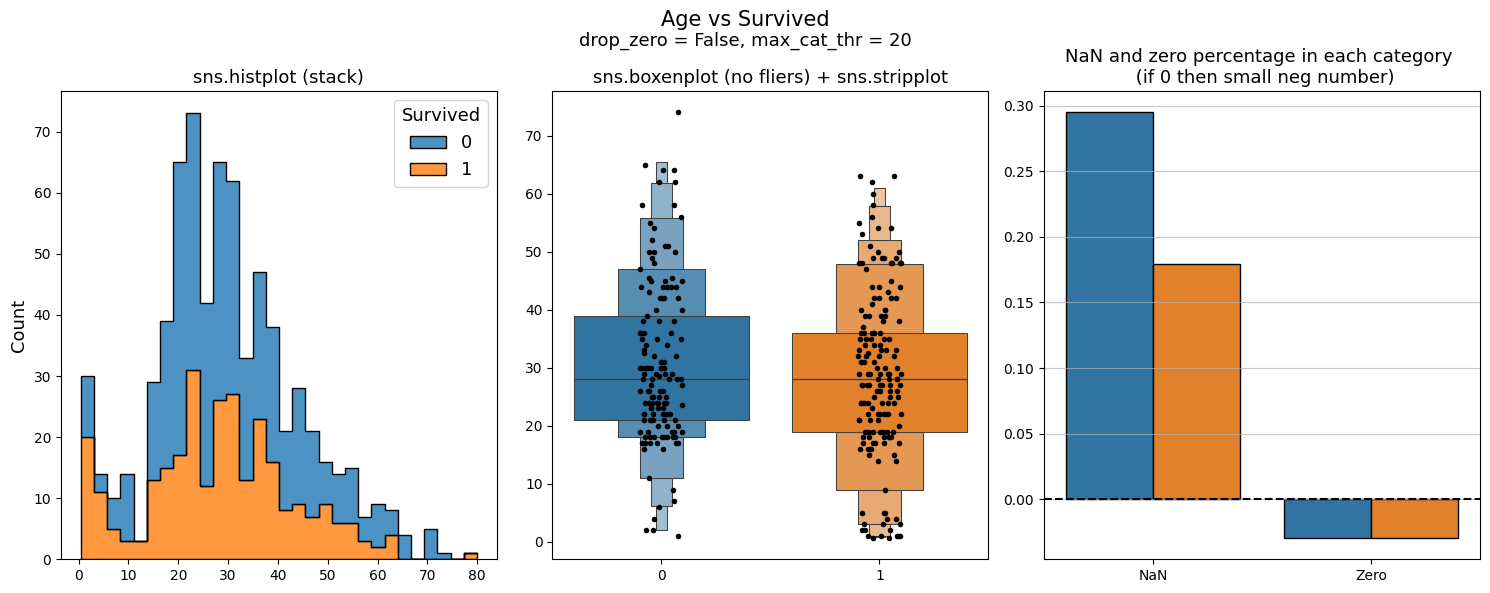

C:\Users\alexe\AppData\Local\Temp\ipykernel_14852\3193168302.py:90: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.stripplot(data=df.groupby(hue).sample(200), y=col_filtered, x=hue, ax=ax['b'], color='black', size=4)


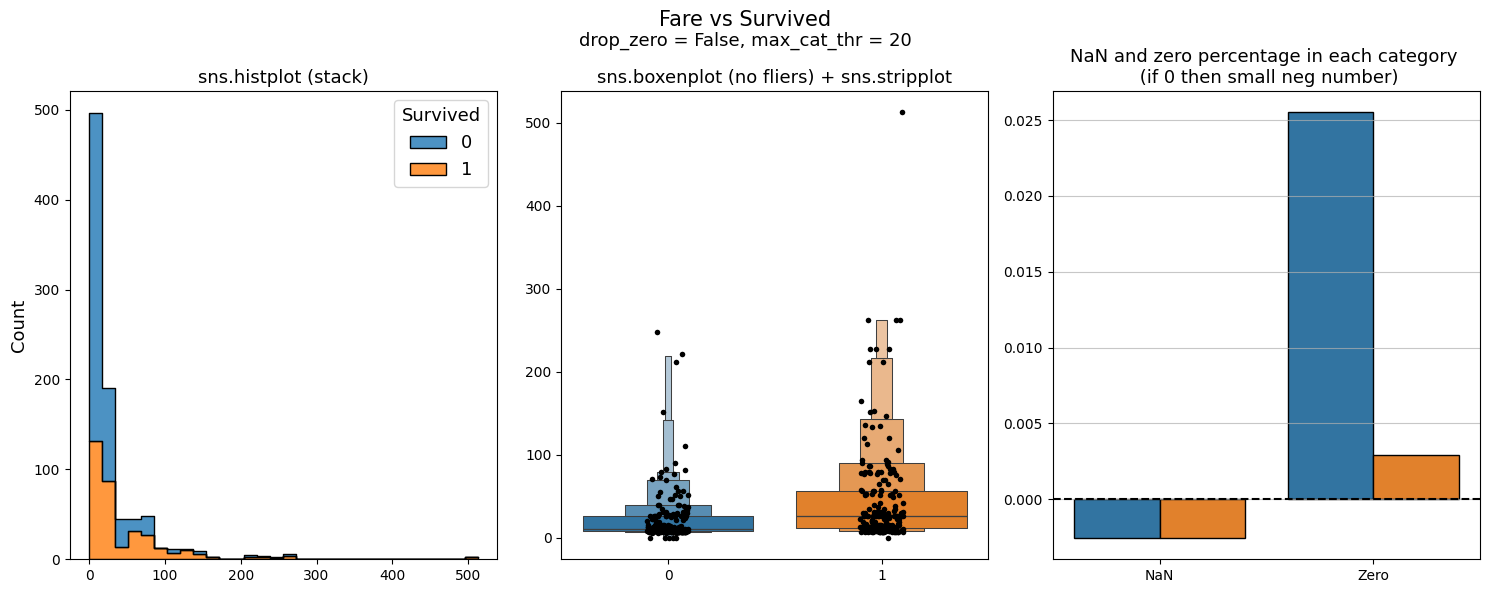

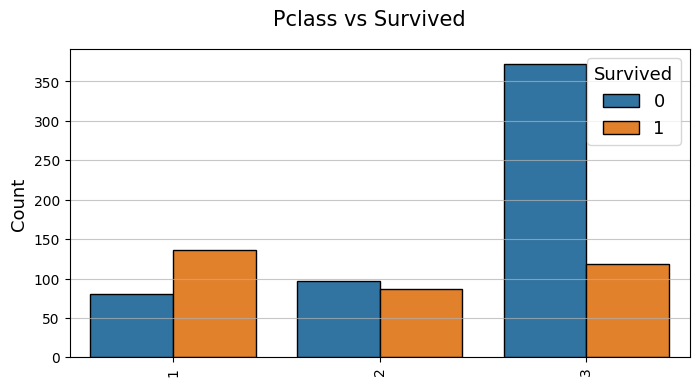

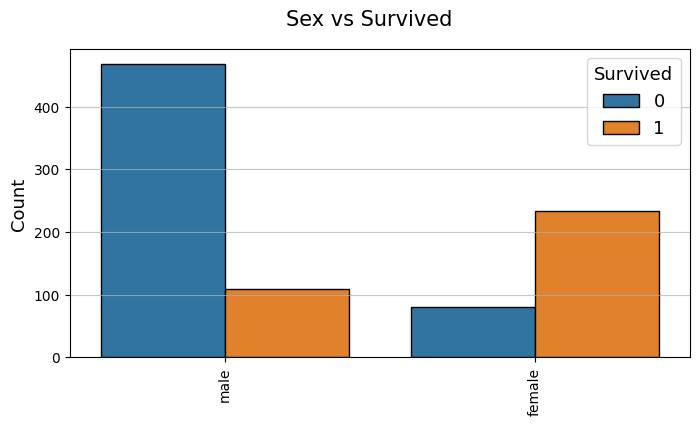

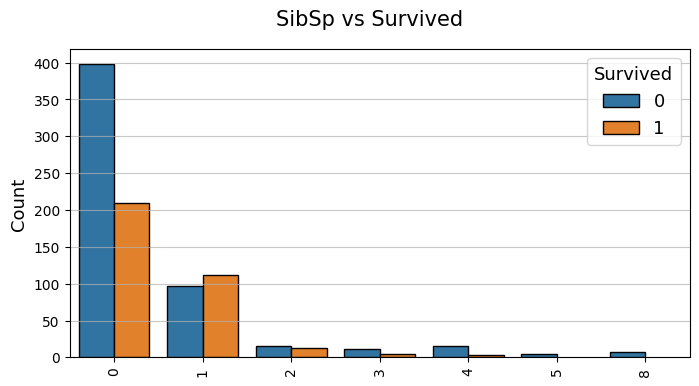

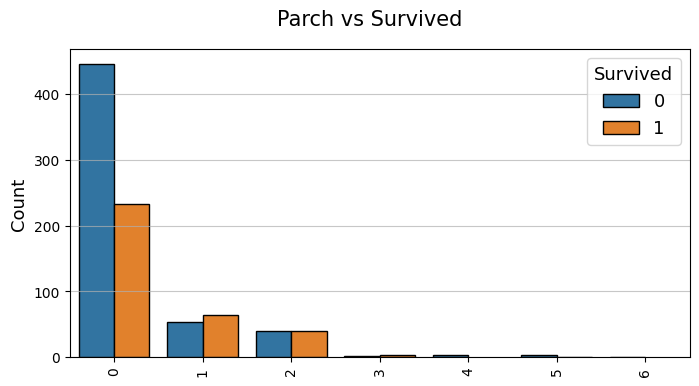

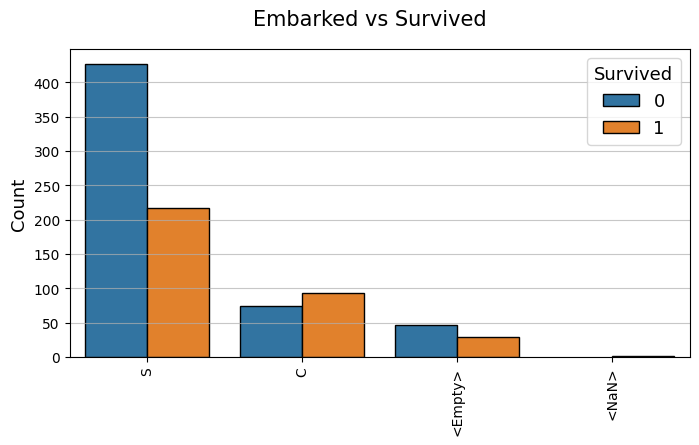

In [9]:
# ваш пример
plot_density(df, hue='Survived', cols=df.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
################################################################################


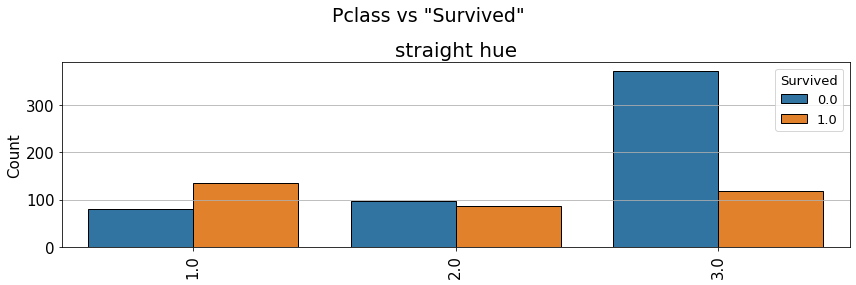

################################################################################


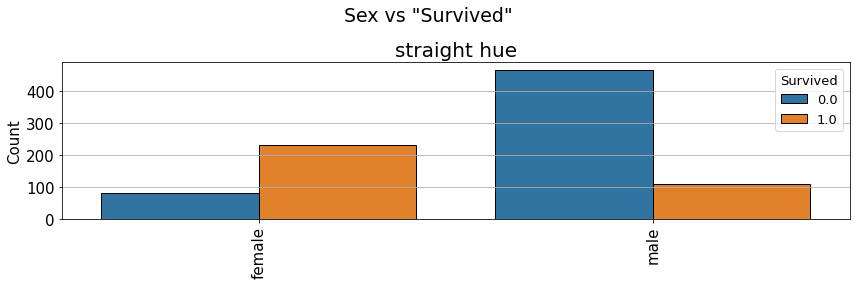

################################################################################


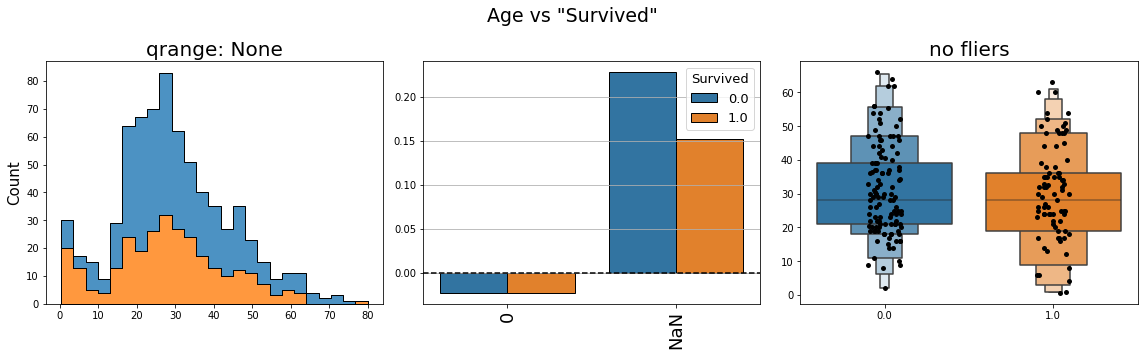

################################################################################


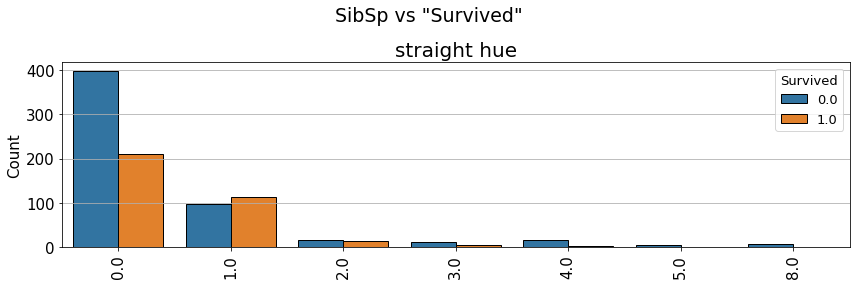

################################################################################


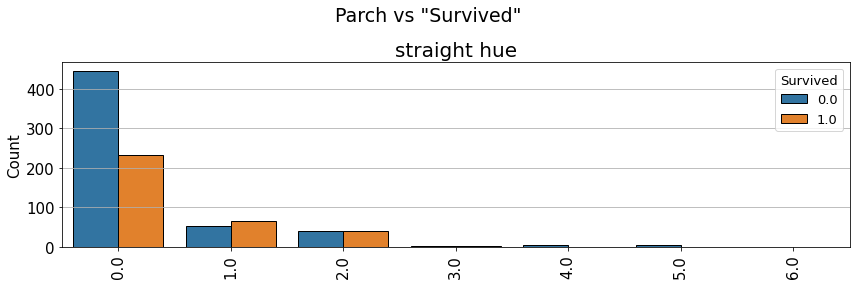

################################################################################


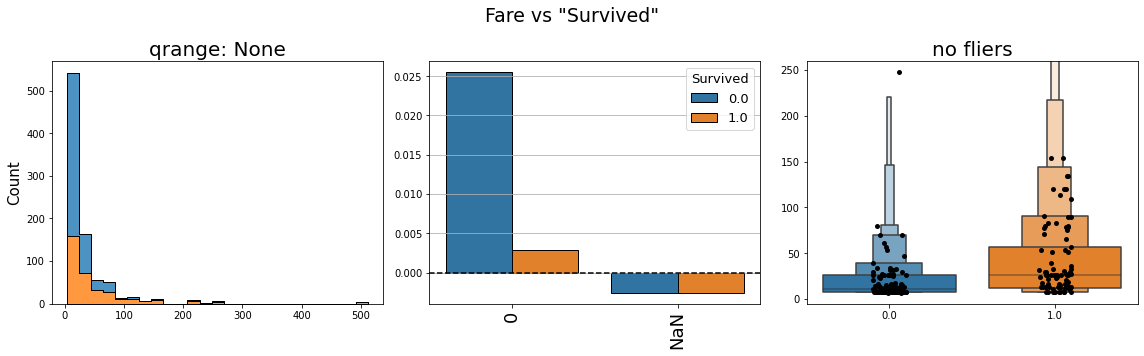

################################################################################


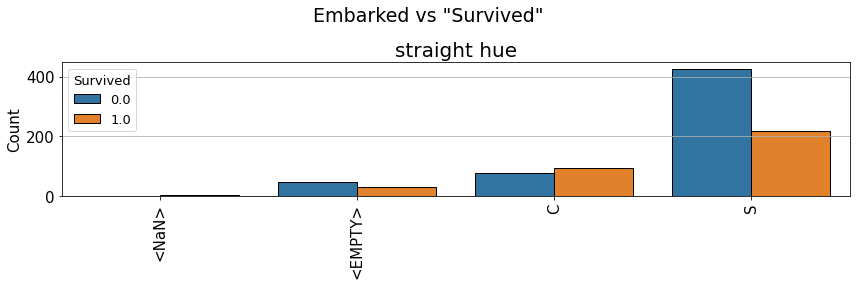

################################################################################


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

plot_density(df, hue='Survived')

***Вопрос:*** Как вы думаете, какие проблемы с этой рисовалкой могут возникнуть при применении ее на других датасетах?

Если честно, то пока тяжело представить, в чем именно будут трудности при дальнейшем использовании, но скорее всего могут возникнуть такие проблемы:
1) Если в колонке будут разные типы, то код сработает непредсказуемо, тк изначально рассчитывается, что данные в каждой колонке одного типа
2) Это может возникнуть и при работе с этим датасетом, но все же. Если передать в параметр hue категориальную колонку с большим количеством значений, то визуализация будет сильно сжатой и непонятной.
3) Если в датасете будет оооооооочень много колонок, то, возможно, код будет работать долго (но я не особо вижу как это можно пофиксить, а именно как убрать итерирование по столбцам)

## УРА УРА УРА КОНЕЦ ДОМАШКИ!!! СПАСИБО ЗА ПОЛЕЗНЫЙ ОПЫТ!!!